<a href="https://colab.research.google.com/github/Babs-Coding/Refonte/blob/main/First_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel("Online_Retail.xlsx")
print(df.head())

print(df.info())

print(df.describe())

print(df.isnull().sum())

df.to_csv("Advanced_Cleaned_retail.csv" , index=False)

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       -----------

In [ ]:
import pandas as pd

df = pd.read_excel("Online_Retail.xlsx")

df['total_price'] = df['Quantity'] * df['UnitPrice']

today = pd.to_datetime('2025-04-07')
df['recency'] = (today - df['InvoiceDate']).dt.days

# number of purchases per customer
frequency = df.groupby('CustomerID')['InvoiceDate'].count().reset_index()
frequency.column = ['CustomerID','frequency']

monetary = df.groupby('CustomerID')['total_price'].sum().reset_index()
monetary.columns = ['CustomerID','monetary']

rfm = pd.merge(frequency, monetary, on= 'CustomerID')
rfm['recency'] = df.groupby('CustomerID')['recency'].min().reset_index(drop=True)


df["InvoiceYear"] = df["InvoiceDate"].dt.year
df["InvoiceMonth"] = df["InvoiceDate"].dt.month
df["InvoiceDayOfWeek"] = df["InvoiceDate"].dt.dayofweek

df["HolidayPeriod"] = df["InvoiceMonth"].isin([11,12]).astype(int)


df.to_csv("customer_features.csv" , index=False)

print(rfm)

print(df)

<ipython-input-2-b05d8af20b6b>:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  frequency.column = ['CustomerID','frequency']


      CustomerID  InvoiceDate  monetary  recency
0        12346.0            2      0.00     5192
1        12347.0          182   4310.00     4869
2        12348.0           31   1797.24     4942
3        12349.0           73   1757.55     4885
4        12350.0           17    334.40     5177
...          ...          ...       ...      ...
4367     18280.0           10    180.60     5144
4368     18281.0            7     80.82     5047
4369     18282.0           13    176.60     4874
4370     18283.0          756   2094.88     4870
4371     18287.0           70   1837.28     4909

[4372 rows x 4 columns]
       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4 

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0     

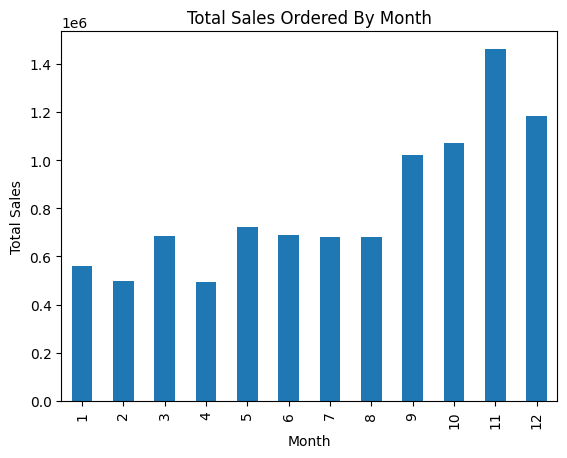

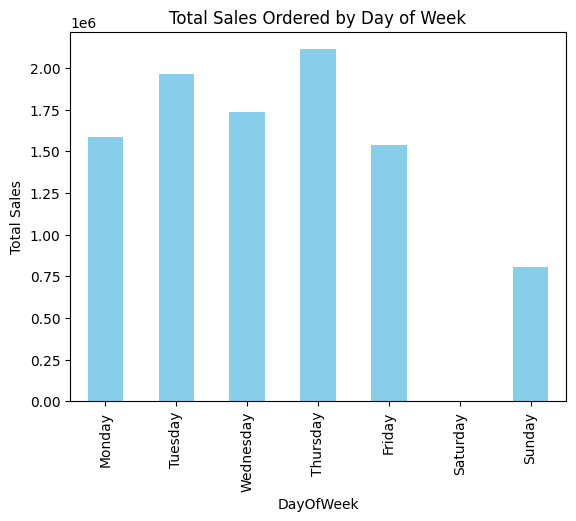

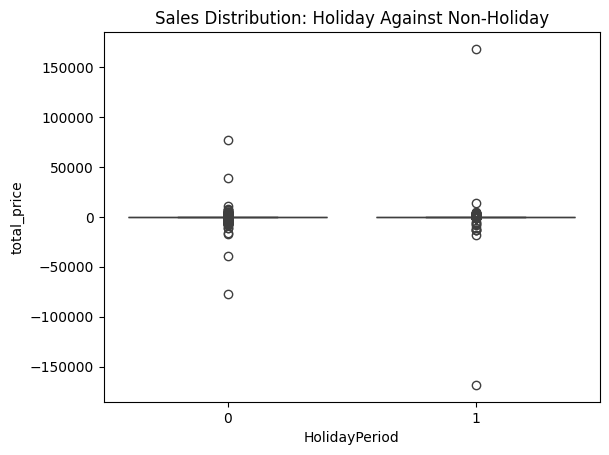

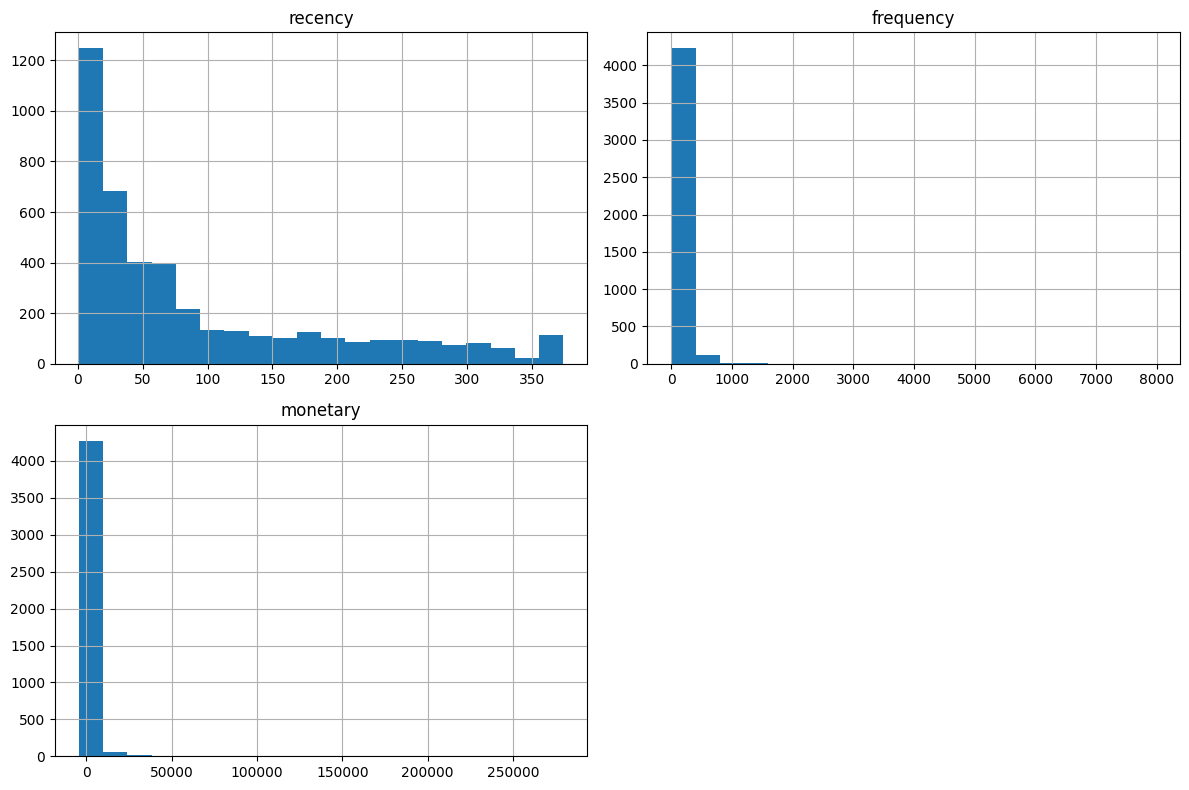

            recency  frequency  monetary Re_rank Mo_rank Frq_rank  Score
CustomerID                                                              
12347.0           2        182   4310.00       4       4        4     12
12357.0          33        131   6207.67       3       4        4     11
12359.0           8        254   6245.53       4       4        4     12
12362.0           3        274   5154.58       4       4        4     12
12380.0          22        105   2720.56       3       4        4     11
...             ...        ...       ...     ...     ...      ...    ...
18241.0          10        105   2058.09       4       4        4     12
18245.0           7        177   2507.56       4       4        4     12
18257.0          39        123   2265.38       3       4        4     11
18272.0           3        170   3064.78       4       4        4     12
18283.0           4        756   2094.88       4       4        4     12

[843 rows x 7 columns]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("customer_features.csv")

df['InvoiceDate'] = pd.to_datetime (df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()


#Monthly sales

monthly_sales = df.groupby('Month')['total_price'].sum()
monthly_sales.plot(kind='bar', title= 'Total Sales Ordered By Month')
plt.ylabel('Total Sales')
plt.show()

#Day of weeks sales

dow_sales = df.groupby('DayOfWeek')['total_price'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
dow_sales.plot(kind='bar', title= 'Total Sales Ordered by Day of Week', color='skyblue')
plt.ylabel('Total Sales')
plt.show()


#Holiday against Non-Holiday sales

sns.boxplot(x='HolidayPeriod', y='total_price', data=df)
plt.title('Sales Distribution: Holiday Against Non-Holiday')
plt.show()


#Histogram

snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'CustomerID': 'count',
    'total_price': 'sum'
}).rename(columns={'InvoiceDate': 'recency', 'CustomerID': 'frequency', 'total_price': 'monetary'})

rfm.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

#Identifying high value customers

rfm['Re_rank'] = pd.qcut(rfm['recency'], 4, labels=[4,3,2,1])
rfm['Mo_rank'] = pd.qcut(rfm['monetary'], 4, labels=[1,2,3,4])
rfm['Frq_rank'] = pd.qcut(rfm['frequency'].rank(method='first'), 4, labels=[1,2,3,4])

rfm['Score'] = rfm['Re_rank'].astype(int) + rfm['Mo_rank'].astype(int) + rfm['Frq_rank'].astype(int)

high_value_customers = rfm[rfm['Score'] > 10]
print(high_value_customers)

#Clustering prep

rfm_for_clustering = rfm[['recency', 'monetary', 'frequency']]

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_for_clustering)


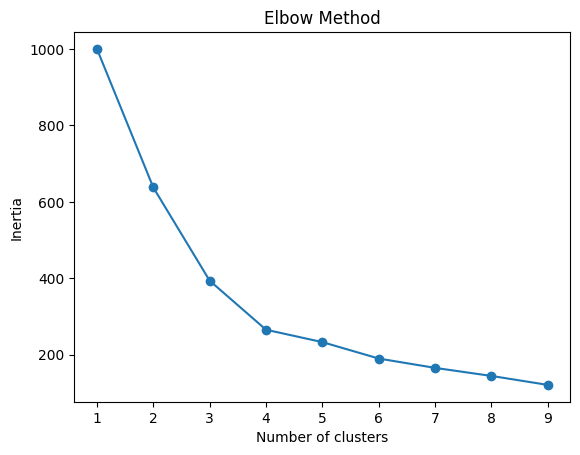

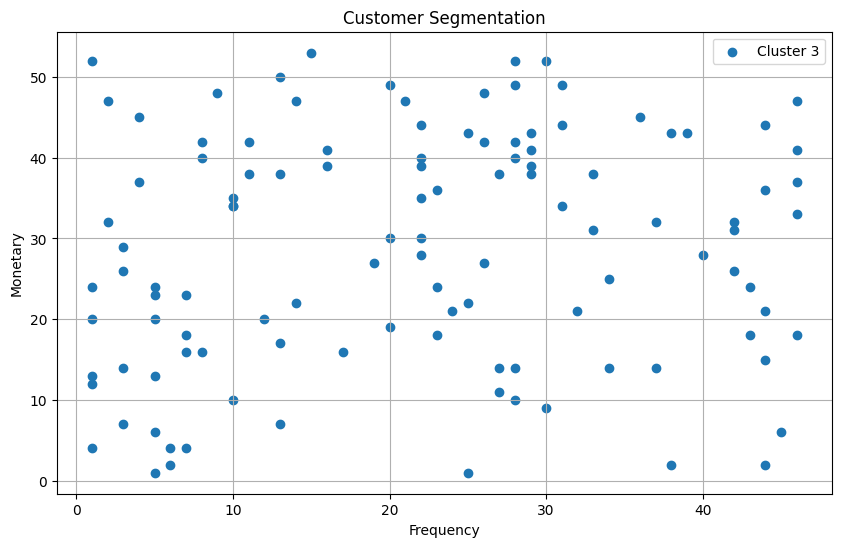

         frequency           monetary         cluster
              mean min max       mean min max   count
cluster                                              
0        71.138686  47  99  26.102190   1  49     137
1        27.950000   1  50  78.216667  53  99     120
2        71.124031  48  97  73.054264  50  99     129
3        21.798246   1  46  28.605263   1  53     114


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("customer_features.csv")

#Clustering for segmentation

np.random.seed(50)
data = {'frequency': np.random.randint(1,100,500), 'monetary': np.random.randint(1,100,500)}
df = pd.DataFrame(data)

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(df)

elbowmeth = []
k_range = range(1,10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    elbowmeth.append(kmeans.inertia_)

plt.plot(k_range, elbowmeth, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['cluster'] = kmeans.fit_predict(rfm_scaled)

plt.figure(figsize=(10,6))
for cluster in range(best_k):
    cluster_data = df[df['cluster'] == cluster]

plt.scatter(cluster_data['frequency'], cluster_data['monetary'], label=f'Cluster {cluster}')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Customer Segmentation')
plt.legend()
plt.grid(True)
plt.show()


#interpretation

print(df.groupby('cluster').agg({'frequency': ['mean', 'min', 'max'],'monetary': ['mean', 'min', 'max'], 'cluster': 'count'}))

df.to_csv("customer_segmentation.csv", index=False)


Linear Regression R-squared: -0.03776598748301119
Random Forest R-squared: -0.4593966523046449
LR MAE: 231.908
RFR MAE: 264.448
LR RMSE: 276.837
RFR RMSE: 328.292


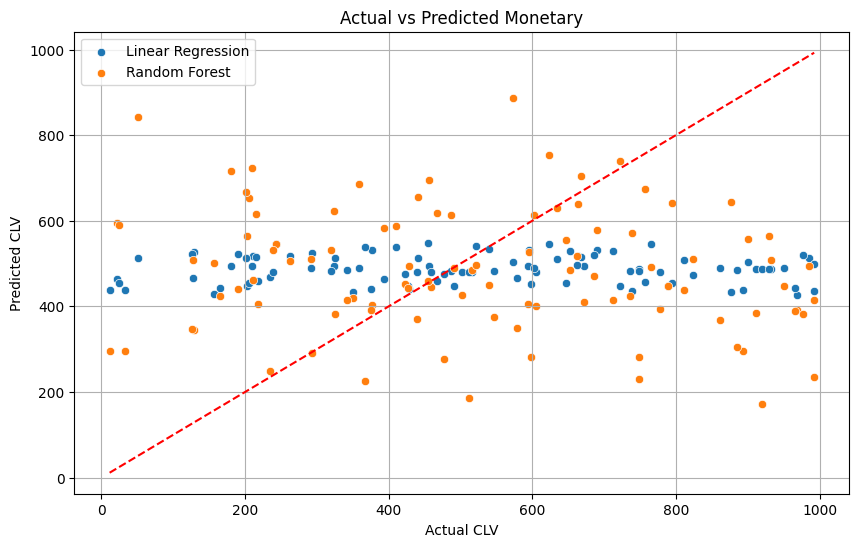

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

df = pd.read_csv("customer_features.csv")
df = pd.DataFrame({'recency': np.random.randint(1,100,500), 'monetary': np.random.uniform(1,1000,500), 'frequency': np.random.randint(1,100,500), 'HolidayPeriod': np.random.randint(0,2,500)})

X = df[['recency', 'frequency', 'HolidayPeriod']]
y = df['monetary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Regression model using both models
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

#Evaluation of the model
lr_r2 = r2_score(y_test, y_pred_lr)
rf_r2 = r2_score(y_test, y_pred_rf)

lr_mae = mean_absolute_error(y_test, y_pred_lr)
rf_mae = mean_absolute_error(y_test, y_pred_rf)

lr_mse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rf_mse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Linear Regression R-squared: {lr_r2}")
print(f"Random Forest R-squared: {rf_r2}")
print(f"LR MAE: {lr_mae:.3f}")
print(f"RFR MAE: {rf_mae:.3f}")
print(f"LR RMSE: {lr_mse:.3f}")
print(f"RFR RMSE: {rf_mse:.3f}")

#Visualisation of Actual vs Predicted

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_lr, label='Linear Regression')
sns.scatterplot(x=y_test, y=y_pred_rf, label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.title('Actual vs Predicted Monetary')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#INSIGHTS AND RECOMMENDATIONS ----